In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv('PreScreen_r3/palm_ffb.csv', parse_dates=['Date'], dayfirst=True)

data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
# Identify null data in the table if any

data.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
Date             130 non-null datetime64[ns]
SoilMoisture     130 non-null float64
Average_Temp     130 non-null float64
Min_Temp         130 non-null float64
Max_Temp         130 non-null float64
Precipitation    130 non-null float64
Working_days     130 non-null int64
HA_Harvested     130 non-null float64
FFB_Yield        130 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.3 KB


In [5]:
data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


### The analysis roughly compares each month and year to see which month/year produces the most and the least FFB of oil palm.

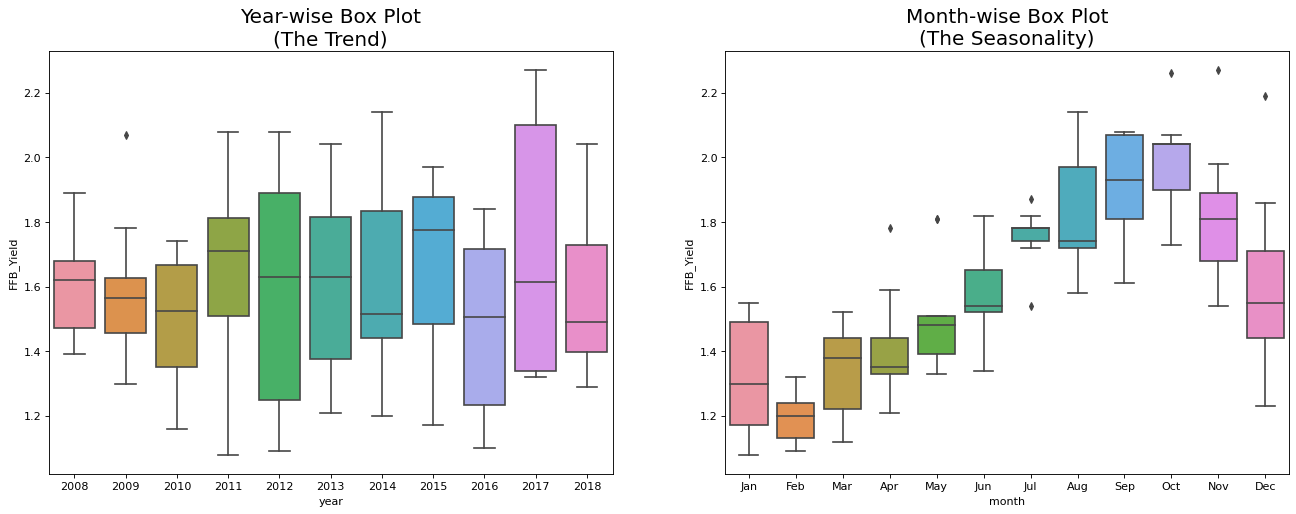

In [6]:
#data.reset_index(inplace=True)


# Prepare data
data['year'] = [d.year for d in data.Date]
data['month'] = [d.strftime('%b') for d in data.Date]
years = data['year'].unique()


# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='FFB_Yield', data=data, ax=axes[0])
sns.boxplot(x='month', y='FFB_Yield', data=data.loc[~data.year.isin([2008, 2018]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Each year produces different median despite the same amount of months and time. However, the values showed in the month-wise differ from one another that could probably due to factors e.g. weather, season, moisture, workings days and etc.

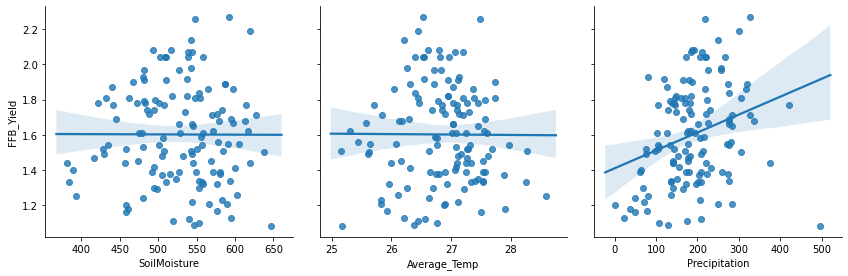

In [7]:
pp =  sns.pairplot(data =data, y_vars = ['FFB_Yield'], x_vars = ['SoilMoisture', 'Average_Temp', 'Precipitation'], kind = 'reg', height = 4 )

In [47]:
data2 = data. drop(['Date', 'month', 'year'], axis=1)
variables = [var for var in data2.columns]

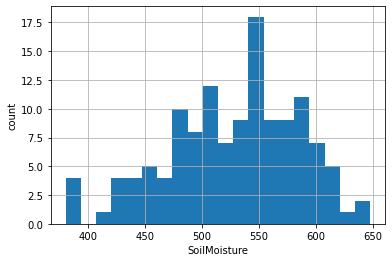

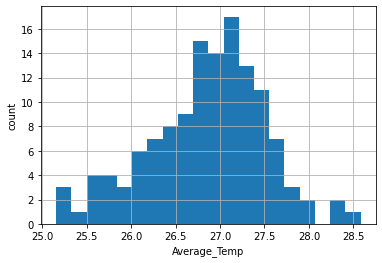

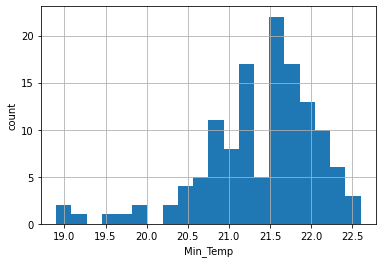

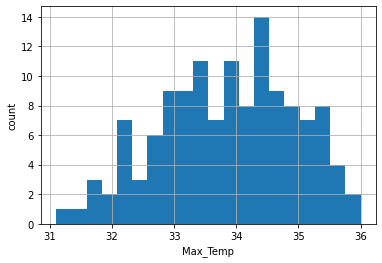

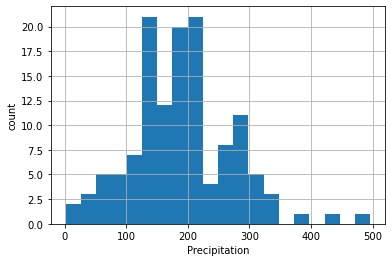

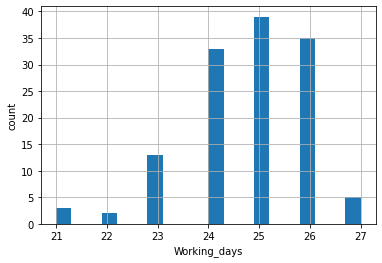

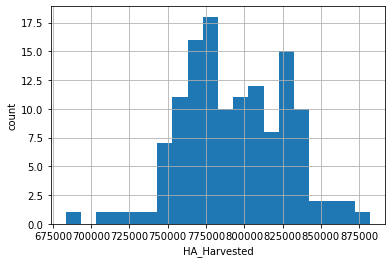

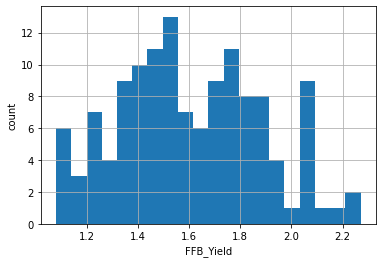

In [48]:
def graph_plot(input, var):
    input = input.copy()   
    #input[var].plot(kind='hist', figsize=(4,4), linewidth=1.2, color='blue', edgecolor='cyan')
    input[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel("count")
    plt.show()
    
for var in variables:
    graph_plot(data2, var)

## Since working days is a controlling factor.

In [10]:
data['Working_days'].describe()

count    130.000000
mean      24.753846
std        1.239289
min       21.000000
25%       24.000000
50%       25.000000
75%       26.000000
max       27.000000
Name: Working_days, dtype: float64

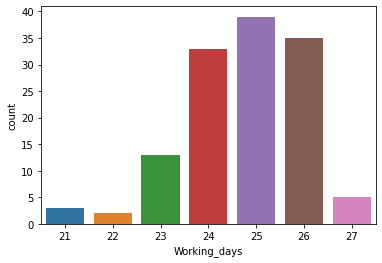

In [11]:
x = "Working_days"
data = data

sns.countplot(x, data = data)
plt.show()

### minimum number of working days per month is 21 and the highest number of working days is 27. Meanwhile, working days is at approximate of 24 - 26 days per month.

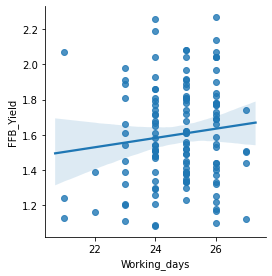

In [12]:
pp =  sns.pairplot(data =data, y_vars = ['FFB_Yield'], x_vars = ['Working_days'], kind = 'reg', height = 4 )

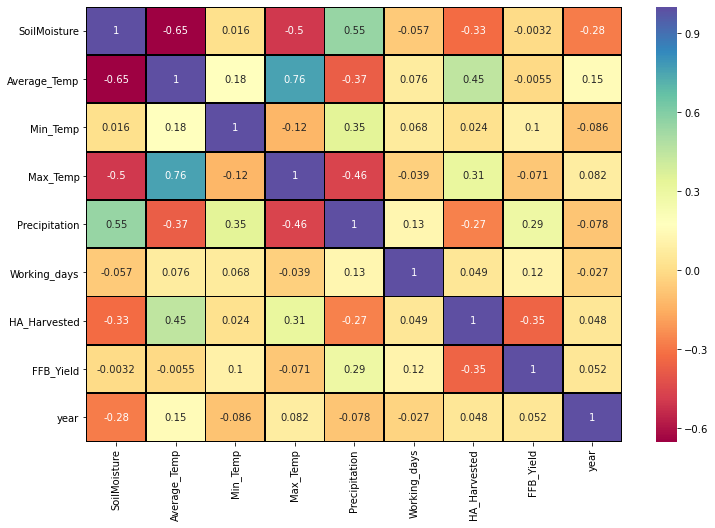

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='Spectral',linewidths=0.8, linecolor = 'black')
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [14]:
correlation = data.corr()

In [15]:
correlation

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,year
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183,-0.279124
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494,0.152668
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830,-0.085757
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201,0.081526
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604,-0.077731
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364,-0.026845
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222,0.047524
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000,0.051947
year,-0.279124,0.152668,-0.085757,0.081526,-0.077731,-0.026845,0.047524,0.051947,1.000000


### Precipitation has a slight correlation when it comes to FFB_Yield followed by working days

In [16]:
correlation['FFB_Yield']

SoilMoisture    -0.003183
Average_Temp    -0.005494
Min_Temp         0.103830
Max_Temp        -0.071201
Precipitation    0.289604
Working_days     0.116364
HA_Harvested    -0.350222
FFB_Yield        1.000000
year             0.051947
Name: FFB_Yield, dtype: float64

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop(['Date', 'FFB_Yield', 'year', 'month'], axis = 1) #independent columns
y = data.FFB_Yield   #target column i.e price range


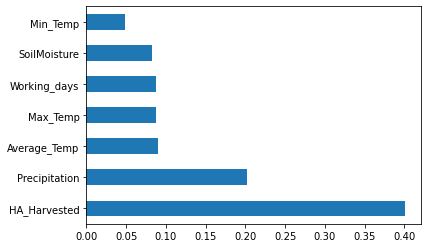

               Importance
HA_Harvested     0.401089
Precipitation    0.202245
Average_Temp     0.089838
Max_Temp         0.088009
Working_days     0.087854
SoilMoisture     0.082905
Min_Temp         0.048060


In [37]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(imp)

In [38]:
xgb.feature_importances_

array([0.08290483, 0.08983821, 0.0480598 , 0.0880093 , 0.20224454,
       0.08785427, 0.40108907], dtype=float32)

### The score showed that Harvested area scored the highest point followed by precipitation and average temperature.